In [1]:
pip install -U spacy

Requirement already up-to-date: spacy in c:\users\hp\anaconda3\lib\site-packages (3.3.1)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import spacy

In [5]:
from spacy.lang.en.stop_words import STOP_WORDS

In [6]:
df = pd.read_csv("twitter analysis.csv",encoding="latin1", header=None)

In [7]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [8]:
df = df[[5,0]]

In [9]:
df.columns=['twits','sentiment']

In [10]:
df.head()

,twits,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [11]:
df['sentiment'].value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [12]:
sent_map = { 0: 'negative',
            4: 'positive'}

### Word Counts:

In [13]:
df['word_count']=df['twits'].apply(lambda x: len(str(x).split()))

In [14]:
df.head()

,twits,sentiment,word_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19
1,is upset that he can't update his Facebook by ...,0,21
2,@Kenichan I dived many times for the ball. Man...,0,18
3,my whole body feels itchy and like its on fire,0,10
4,"@nationwideclass no, it's not behaving at all....",0,21


### Characters  counts

In [15]:
df['character_count']=df['twits'].apply(lambda x : len(x))

In [16]:
df.head()

,twits,sentiment,word_count,character_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115
1,is upset that he can't update his Facebook by ...,0,21,111
2,@Kenichan I dived many times for the ball. Man...,0,18,89
3,my whole body feels itchy and like its on fire,0,10,47
4,"@nationwideclass no, it's not behaving at all....",0,21,111


### Average Word Length

In [17]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len=word_len +len(word)
    return word_len/len(words)  # = len(x)/len(words)
                

In [18]:
#len("this is nlp lesson")/4 not including spaces
#number of character divided by number of words 

In [19]:
df['avg_word_len'] = df['twits'].apply(lambda x: get_avg_word_len(x) )

In [20]:
df.head()

,twits,sentiment,word_count,character_count,avg_word_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444
3,my whole body feels itchy and like its on fire,0,10,47,3.700000
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714


### stop words count

In [21]:
print(STOP_WORDS)

{'get', 'all', 'me', 'nine', 'rather', 'will', 'move', "'ve", 'anyone', 'your', 'whenever', 'becomes', 'am', 'last', 'seemed', 'hereafter', 'by', 'hereupon', "'d", 'no', 'thru', 'and', 'fifteen', 'unless', 'myself', 'this', 'around', 'is', 'until', '’s', 'herself', 'though', 'made', 'fifty', 'whatever', 'more', 'nothing', 'mostly', 'amount', 'latterly', 'herein', 'an', 'put', 'formerly', 'do', 'noone', 'what', 'or', 'towards', 'elsewhere', 'therefore', 'does', 'seem', 'almost', 'thereafter', 'keep', 'most', 'than', 'without', 'nor', 'call', 'nevertheless', 'for', 'every', 'thereupon', 'top', 'against', 'each', 'anywhere', 'from', 'his', 'a', 'anyhow', 'you', 'might', 'yourself', 'else', 'down', 'afterwards', 'six', 'before', 'between', 'go', 'whom', 'either', 'former', 'forty', 'just', 'at', 'third', 'bottom', 'still', 'five', 'on', 'nobody', 'using', 'of', 'once', 'our', 'several', 'about', 'moreover', '’ll', 'everywhere', 'be', 'them', 'which', 'except', "n't", 'their', 'next', 'besi

In [22]:
df['stop_words_count'] = df['twits'].apply(lambda x: len([t for t in x.split() if t in STOP_WORDS]))

In [23]:
df.head()

,twits,sentiment,word_count,character_count,avg_word_len,stop_words_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10


In [24]:
# stop words count
#x = " this is text data"
#y=x.split()

In [25]:
#for t in y:

    #if t in STOP_WORDS:
        #print(t)

###   Count # hash tags and @ mentions

In [26]:
x = " this is # hash tag and this is @ mentions"
#x=x.split()
#x

In [27]:
for t in x.split():
    if t.startswith("#"):
        print(t)
    

#


In [28]:
df['count_hashtags'] = df['twits'].apply(lambda x: len([t for t in x.split() if t.startswith("#")]))

In [29]:
df['count_mentions'] = df['twits'].apply(lambda x : len([t for t in x.split() if t.startswith("@")]))

In [30]:
df.head()

,twits,sentiment,word_count,character_count,avg_word_len,stop_words_count,count_hashtags,count_mentions
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1


### if numeric digits are presents  in twitts


In [31]:
df['numeric_count'] = df['twits'].apply(lambda x: len([ t for t in x.split() if t .isdigit()]))

In [32]:
df.head()

,twits,sentiment,word_count,character_count,avg_word_len,stop_words_count,count_hashtags,count_mentions,numeric_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0


### UPPER case words count

In [33]:
df["upper_counts"] = df['twits'].apply(lambda x : len([t for t in x.split() if t.isupper() and len(x)>3]))

In [34]:
df.head()

,twits,sentiment,word_count,character_count,avg_word_len,stop_words_count,count_hashtags,count_mentions,numeric_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0,1


In [35]:
df.loc[96]['twits']

"so rylee,grace...wana go steve's party or not?? SADLY SINCE ITS EASTER I WNT B ABLE 2 DO MUCH  BUT OHH WELL....."

## preprocessing and cleaning

## lower case conversion

In [36]:
df['twits'] = df['twits'].apply(lambda x: x.lower())

In [37]:
df.head()

,twits,sentiment,word_count,character_count,avg_word_len,stop_words_count,count_hashtags,count_mentions,numeric_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his facebook by ...,0,21,111,4.285714,9,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0,1


In [38]:
df.iloc[96]['twits']

"so rylee,grace...wana go steve's party or not?? sadly since its easter i wnt b able 2 do much  but ohh well....."

### contraction and expansion

In [39]:
x = " i don't know what you want, can't, he'll, i'd"


In [40]:
 contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and "}

In [41]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [42]:
x = "I n u"

In [43]:
cont_to_exp(x)

'I and u'

In [44]:
%%time
df["twits"] = df["twits"].apply(lambda x: cont_to_exp(x))

Wall time: 1min 2s


In [45]:
df.head()

,twits,sentiment,word_count,character_count,avg_word_len,stop_words_count,count_hashtags,count_mentions,numeric_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1


### count and remove emails

In [46]:
import re

In [47]:
x="hi my email me at email@email.com "

In [48]:
re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)',x)

['email@email.com']

In [49]:
df["emails"] = df["twits"].apply(lambda x: re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)',x))

In [50]:
df["emails_count"] = df["emails"].apply(lambda x: len(x))

In [51]:
df[df["emails_count"]>0]

,twits,sentiment,word_count,character_count,avg_word_len,stop_words_count,count_hashtags,count_mentions,numeric_count,upper_counts,emails,emails_count
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,103,4.150000,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole elledell@gmail.com?,0,3,31,9.000000,1,0,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all th...,0,20,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1
10290,@laureystack awh...that is kinda sad lol add ...,0,8,76,8.500000,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,137,5.428571,7,0,1,1,0,[press@linkedin.com],1
...,...,...,...,...,...,...,...,...,...,...,...,...
1588338,@boudoirsextoys do not forget to shoot me an e...,4,21,127,5.047619,10,0,1,0,1,[hello@tastelikekisses.com],1
1589132,"hi there , anybody got a job for me oil &amp;...",4,15,98,5.533333,4,0,0,0,0,[aadvanspijk@yahoo.co.uk],1
1590489,"@clericaaron yes, lbruton@tulsalanparty.com is...",4,14,95,5.785714,6,0,1,0,1,[lbruton@tulsalanparty.com],1
1591675,@miss_ellen good morning!!!! congrats! se...,4,9,77,7.111111,2,0,1,0,0,[jill@q985fm.com],1


In [52]:
re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)'," ",x)

'hi my email me at   '

In [53]:
df["twits"] = df["twits"].apply(lambda x: re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)'," ",x))

In [54]:
df[df["emails_count"]>0].head()

,twits,sentiment,word_count,character_count,avg_word_len,stop_words_count,count_hashtags,count_mentions,numeric_count,upper_counts,emails,emails_count
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,103,4.150000,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole ?,0,3,31,9.000000,1,0,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all th...,0,20,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1
10290,@laureystack awh...that is kinda sad lol add ...,0,8,76,8.500000,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,137,5.428571,7,0,1,1,0,[press@linkedin.com],1


### count urls and remove it

In [55]:
x = "hi, to watch more visit http://youtube.com/code"

In [56]:
re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:\/~+#-]*[\w@?^=%&\/~+#-])',x)

[('http', 'youtube.com', '/code')]

In [57]:
df["urls_flag"] = df["twits"].apply(lambda x: re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:\/~+#-]*[\w@?^=%&\/~+#-])',x))

In [58]:
re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:\/~+#-]*[\w@?^=%&\/~+#-])',' ',x)

'hi, to watch more visit  '

In [59]:
df["twits"] = df["twits"].apply(lambda x: re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:\/~+#-]*[\w@?^=%&\/~+#-])',' ',x))

In [60]:
df.head()

,twits,sentiment,word_count,character_count,avg_word_len,stop_words_count,count_hashtags,count_mentions,numeric_count,upper_counts,emails,emails_count,urls_flag
0,"@switchfoot - awww, that is a bummer. you s...",0,19,115,5.052632,4,0,1,0,1,[],0,"[(http, twitpic.com, /2y1zl)]"
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,[]
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,[],0,[]
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,[]
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1,[],0,[]


In [61]:
df["urls_count"]=df["urls_flag"].apply(lambda x : len(x))

In [62]:
df.head()

,twits,sentiment,word_count,character_count,avg_word_len,stop_words_count,count_hashtags,count_mentions,numeric_count,upper_counts,emails,emails_count,urls_flag,urls_count
0,"@switchfoot - awww, that is a bummer. you s...",0,19,115,5.052632,4,0,1,0,1,[],0,"[(http, twitpic.com, /2y1zl)]",1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,[],0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,[],0,[],0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,[],0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1,[],0,[],0


In [63]:
df.loc[0]["twits"]

'@switchfoot   - awww, that is a bummer.  you shoulda got david carr of third day to do it. ;d'

### remove RT(re  twit)

In [64]:
df["twits"] = df["twits"].apply(lambda x: re.sub("RT","",x))

### removing special character or panctuation removal

In [65]:
df["twits"] =  df["twits"].apply(lambda x: re.sub('[^ A-Z a-z 0-9-]+',' ',x))

In [66]:
df.head()

,twits,sentiment,word_count,character_count,avg_word_len,stop_words_count,count_hashtags,count_mentions,numeric_count,upper_counts,emails,emails_count,urls_flag,urls_count
0,switchfoot - awww that is a bummer you s...,0,19,115,5.052632,4,0,1,0,1,[],0,"[(http, twitpic.com, /2y1zl)]",1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,[],0
2,kenichan i dived many times for the ball man...,0,18,89,3.944444,7,0,1,0,1,[],0,[],0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,[],0
4,nationwideclass no it is not behaving at all...,0,21,111,4.285714,10,0,1,0,1,[],0,[],0


### remove multiple spaces

In [67]:
x = "times    waits   for       no   one"

In [68]:
" ".join(x.split())

'times waits for no one'

In [69]:
df["twits"] = df["twits"].apply(lambda x: " ".join(x.split()))

In [70]:
df.head()

,twits,sentiment,word_count,character_count,avg_word_len,stop_words_count,count_hashtags,count_mentions,numeric_count,upper_counts,emails,emails_count,urls_flag,urls_count
0,switchfoot - awww that is a bummer you shoulda...,0,19,115,5.052632,4,0,1,0,1,[],0,"[(http, twitpic.com, /2y1zl)]",1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,[],0
2,kenichan i dived many times for the ball manag...,0,18,89,3.944444,7,0,1,0,1,[],0,[],0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,[],0
4,nationwideclass no it is not behaving at all i...,0,21,111,4.285714,10,0,1,0,1,[],0,[],0


## Remove HTML tags

In [71]:
from bs4 import BeautifulSoup

In [72]:
x="<html><h2>Thank you<h2><html>"

In [73]:
BeautifulSoup(x,"lxml").get_text()

'Thank you'

In [74]:
%%time
df["twits"] = df["twits"].apply(lambda x:  BeautifulSoup(x,"lxml").get_text())

Wall time: 14min 3s


###   Remove Accenetd character

In [75]:
import unicodedata
x = "àccéntéd téxt "

In [76]:
def remove_accented_character(x):
    x = unicodedata.normalize("NFKD",x).encode("ascii","ignore").decode("utf-8","ignore")
    return x

In [77]:
print(remove_accented_character(x))

accented text 


### spacy and NLP

## Remove Stop Words

In [78]:
import spacy

In [79]:
x="this is stop words removal code"

In [80]:
" ".join([t for t in x.split() if t not in STOP_WORDS])

'stop words removal code'

In [81]:
df["twits"] = df["twits"].apply(lambda x: " ".join([t for t in x.split() if t not in STOP_WORDS]) )

In [82]:
df.head()

,twits,sentiment,word_count,character_count,avg_word_len,stop_words_count,count_hashtags,count_mentions,numeric_count,upper_counts,emails,emails_count,urls_flag,urls_count
0,switchfoot - awww bummer shoulda got david car...,0,19,115,5.052632,4,0,1,0,1,[],0,"[(http, twitpic.com, /2y1zl)]",1
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,[],0,[],0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,0,1,0,1,[],0,[],0
3,body feels itchy like fire,0,10,47,3.700000,5,0,0,0,0,[],0,[],0
4,nationwideclass behaving mad,0,21,111,4.285714,10,0,1,0,1,[],0,[],0


### convert into base or root word

In [83]:
pip install -U spacy-lookups-data

Requirement already up-to-date: spacy-lookups-data in c:\users\hp\anaconda3\lib\site-packages (1.0.3)Note: you may need to restart the kernel to use updated packages.



In [84]:
!python -m spacy download en_core_web_sm

2022-06-23 10:00:30.148050: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-06-23 10:00:30.197370: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.



[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [85]:
!python -m spacy download en_core_web_md

2022-06-23 10:02:18.960999: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-06-23 10:02:18.972038: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [86]:
!python -m spacy download en_core_web_lg

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


2022-06-23 10:02:39.485809: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-06-23 10:02:39.486484: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [87]:
nlp = spacy.load("en_core_web_sm")

In [88]:
x = "kenichan dived times ball managed save 50 rest"

In [89]:
def make_to_base(x):
    x_list=[]
    doc = nlp(x)
    
    for token in doc:
        lemma = str(token.lemma_)
        if lemma == "-PRON-" or lemma == "be":
            lemma=token.text
        x_list.append(lemma)
    print(" ".join(x_list))

In [90]:
make_to_base(x)

kenichan dive time ball manage save 50 rest


### common words removal

In [91]:
" ".join(df.head()["twits"])

'switchfoot - awww bummer shoulda got david carr day d upset update facebook texting cry result school today blah kenichan dived times ball managed save 50 rest bounds body feels itchy like fire nationwideclass behaving mad'

In [92]:
text = " ".join(df["twits"])

In [93]:
text = text.split()

In [94]:
freq_comm = pd.Series(text).value_counts()

In [95]:
freq_comm

good              91120
day               85012
like              78357
s                 75009
-                 72919
                  ...  
supateddz             1
eyesomer              1
rhny                  1
mediterranian         1
pa-pa-pa-poker        1
Length: 624996, dtype: int64

In [96]:
f20 = freq_comm[:20]

In [97]:
f20

good     91120
day      85012
like     78357
s        75009
-        72919
quot     72090
today    68039
love     64801
work     64788
going    64565
got      61278
lol      59141
time     57552
know     51966
im       50673
amp      48706
night    43394
new      42391
want     42283
2        41992
dtype: int64

In [98]:
df['twits'] = df['twits'].apply(lambda x : " ".join ([t for t in x.split() if t not in f20]))

## Rare words removal

In [99]:
rare_20 = freq_comm[-20:]

In [100]:
rare_20

savannamarie21    1
melissaljonas     1
kaaathryn         1
professory        1
foyble            1
eigentlich        1
ninieks           1
susahh            1
cinderella-esq    1
funkymonk1        1
ashleychesney     1
aurhority         1
thurek            1
momntgomery       1
fragilexxhymn     1
supateddz         1
eyesomer          1
rhny              1
mediterranian     1
pa-pa-pa-poker    1
dtype: int64

In [101]:
rare = freq_comm[freq_comm.values == 1]

In [102]:
rare

lachflash          1
hsirr              1
instriped          1
lugaw              1
littlesistermel    1
                  ..
supateddz          1
eyesomer           1
rhny               1
mediterranian      1
pa-pa-pa-poker     1
Length: 400520, dtype: int64

In [103]:
df['twits'] = df['twits'].apply(lambda x : " ".join([t for t in x.split() if t not in rare_20]))

In [104]:
df.head()

,twits,sentiment,word_count,character_count,avg_word_len,stop_words_count,count_hashtags,count_mentions,numeric_count,upper_counts,emails,emails_count,urls_flag,urls_count
0,switchfoot awww bummer shoulda david carr d,0,19,115,5.052632,4,0,1,0,1,[],0,"[(http, twitpic.com, /2y1zl)]",1
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,[],0,[],0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,0,1,0,1,[],0,[],0
3,body feels itchy fire,0,10,47,3.700000,5,0,0,0,0,[],0,[],0
4,nationwideclass behaving mad,0,21,111,4.285714,10,0,1,0,1,[],0,[],0


## world cloud visualization

In [105]:
!pip install worldcloud

ERROR: Could not find a version that satisfies the requirement worldcloud (from versions: none)
ERROR: No matching distribution found for worldcloud


In [106]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [107]:
x = ' '.join(text[:20000])

In [108]:
len(text)

11176461

In [109]:
wc  = WordCloud(width = 800, height = 400).generate(x)

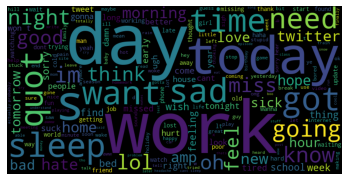

In [110]:
plt.imshow(wc)
plt.axis('off')
plt.show()


### Spelling correction

In [111]:
!pip install -U textblob

Requirement already up-to-date: textblob in c:\users\hp\anaconda3\lib\site-packages (0.17.1)


In [112]:
!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [113]:
from textblob import TextBlob

In [114]:
 x = "tnks for wathing"

In [115]:
x = TextBlob(x).correct()

In [116]:
x

TextBlob("tanks for watching")

### Tokenization

In [117]:
x = "thanks#watching this video. please do like it "

In [118]:
TextBlob(x).words

WordList(['thanks', 'watching', 'this', 'video', 'please', 'do', 'like', 'it'])

In [119]:
doc = nlp(x)
for token in doc:
    print(token)

thanks#watching
this
video
.
please
do
like
it


## lemmatization

In [120]:
x = "runs run running ran"

In [121]:
from textblob import Word

In [122]:
for token in x.split():
    print(Word(token).lemmatize())

run
run
running
ran


In [123]:
doc = nlp(x)
for token in doc:
    print(token.lemma_)

run
run
run
run


### detecting entity using NER of spacy

In [124]:
x = "Breaking news: Donald Trump, the president of the USA is looking to sign a deal to mine the moon"

In [125]:
doc = nlp(x)
for ent in doc.ents:
    print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

Donald Trump - PERSON - People, including fictional
USA - GPE - Countries, cities, states


In [126]:
from spacy import displacy

In [127]:
displacy.render(doc,style = 'ent')

## detecting Nouns

In [128]:
x

'Breaking news: Donald Trump, the president of the USA is looking to sign a deal to mine the moon'

In [129]:
for noun in doc.noun_chunks:
    print(noun)

Donald Trump
the president
the USA
a deal
the moon


## Translation and language detection

Language code: https://www.loc.gov/standards/iso639-2/php/code_list.php

In [130]:
tb = TextBlob(x)

In [236]:
#tb.detect_language()

In [ ]:
tb.translate(to='hi')

## Use inbuilt sentiment analysis

In [132]:
from textblob.sentiments import NaiveBayesAnalyzer

In [133]:
x = "we all stands together to fight with corona virus and we will win together"

In [134]:
tb = TextBlob(x, analyzer = NaiveBayesAnalyzer())

In [135]:
tb.sentiment

Sentiment(classification='pos', p_pos=0.8259779151942094, p_neg=0.17402208480579007)

## Advanced text processing

## N grams

In [136]:
x = "thanks for watching"

In [137]:
tb = TextBlob(x)

In [138]:
tb.ngrams(3)

[WordList(['thanks', 'for', 'watching'])]

## Bag of words

In [139]:
x = ["this is first sentence", "this is second","this is last"]

In [140]:
from sklearn.feature_extraction.text import CountVectorizer

In [141]:
cv = CountVectorizer(ngram_range = (1,1))
text_counts = cv.fit_transform(x)

In [142]:
text_counts.toarray()

array([[1, 1, 0, 0, 1, 1],
       [0, 1, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 1]], dtype=int64)

In [143]:
cv.get_feature_names()

['first', 'is', 'last', 'second', 'sentence', 'this']

In [144]:
bow = pd.DataFrame(text_counts.toarray(),columns = cv.get_feature_names())

In [145]:
bow

,first,is,last,second,sentence,this
0,1,1,0,0,1,1
1,0,1,0,1,0,1
2,0,1,1,0,0,1


In [146]:
x

['this is first sentence', 'this is second', 'this is last']

## Term Frequency

In [147]:
x

['this is first sentence', 'this is second', 'this is last']

In [148]:
bow

,first,is,last,second,sentence,this
0,1,1,0,0,1,1
1,0,1,0,1,0,1
2,0,1,1,0,0,1


In [149]:
bow.shape

(3, 6)

In [150]:
tf = bow.copy()

In [151]:
for index, row in enumerate(tf.iterrows()):
    for col in row[1].index:
        tf.loc[index,col] = tf.loc[index,col]/sum(row[1].values)

In [152]:
tf

,first,is,last,second,sentence,this
0,0.25,0.250000,0.000000,0.000000,0.25,0.250000
1,0.00,0.333333,0.000000,0.333333,0.00,0.333333
2,0.00,0.333333,0.333333,0.000000,0.00,0.333333


## Inverse Document Frequency

In [153]:
import numpy as np

In [154]:
x_df = pd.DataFrame(x, columns = ['words'])

In [155]:
x_df

,words
0,this is first sentence
1,this is second
2,this is last


In [156]:
bow

,first,is,last,second,sentence,this
0,1,1,0,0,1,1
1,0,1,0,1,0,1
2,0,1,1,0,0,1


In [157]:
N= bow.shape

In [158]:
N

(3, 6)

In [159]:
n = bow.shape[0]
n

3

In [160]:
bb = bow.astype('bool')

In [161]:
bb

,first,is,last,second,sentence,this
0,True,True,False,False,True,True
1,False,True,False,True,False,True
2,False,True,True,False,False,True


In [162]:
bb['is'].sum()

3

In [163]:
cols = bb.columns

In [164]:
cols

Index(['first', 'is', 'last', 'second', 'sentence', 'this'], dtype='object')

In [165]:
nz =[]
for col in cols:
    nz.append(bb[col].sum())

In [166]:
nz

[1, 3, 1, 1, 1, 3]

In [167]:
idf = []
for index,col in enumerate(cols):
    idf.append(np.log(n+1)/(nz[index]+1))
    

In [168]:
idf

[0.6931471805599453,
 0.34657359027997264,
 0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 0.34657359027997264]

In [169]:
bow

,first,is,last,second,sentence,this
0,1,1,0,0,1,1
1,0,1,0,1,0,1
2,0,1,1,0,0,1


## TFIDF

In [170]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [171]:
tfidf = TfidfVectorizer()

In [172]:
x_tfidf = tfidf.fit_transform(x_df['words'])

In [173]:
x_tfidf.toarray()

array([[0.6088451 , 0.35959372, 0.        , 0.        , 0.6088451 ,
        0.35959372],
       [0.        , 0.45329466, 0.        , 0.76749457, 0.        ,
        0.45329466],
       [0.        , 0.45329466, 0.76749457, 0.        , 0.        ,
        0.45329466]])

In [174]:
tfidf.idf_

array([1.69314718, 1.        , 1.69314718, 1.69314718, 1.69314718,
       1.        ])

In [175]:
idf

[0.6931471805599453,
 0.34657359027997264,
 0.6931471805599453,
 0.6931471805599453,
 0.6931471805599453,
 0.34657359027997264]

## Word Embeddings

## Spacy Word2vec

In [176]:
!python -m spacy download en_core_web_lg

2022-06-23 10:16:09.698023: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-06-23 10:16:09.757685: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.



[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [177]:
nlp = spacy.load('en_core_web_lg')

In [178]:
doc = nlp('thank you! dog cat lion dfasaa')

In [179]:
for token in doc:
    print(token.text,token.has_vector)

thank True
you True
! True
dog True
cat True
lion True
dfasaa False


In [180]:
token.vector.shape

(300,)

In [181]:
nlp('cat').vector.shape

(300,)

In [182]:
for token1 in doc:
    for token2 in doc:
        print(token1.text,token2.text,token1.similarity(token2))

thank thank 1.0
thank you 0.5647585391998291
thank ! 0.5214740633964539
thank dog 0.2504264712333679
thank cat 0.20648488402366638
thank lion 0.13629762828350067
thank dfasaa 0.0
you thank 0.5647585391998291
you you 1.0
you ! 0.4390223026275635
you dog 0.3649410009384155
you cat 0.3080798089504242
you lion 0.20392052829265594
you dfasaa 0.0
! thank 0.5214740633964539
! you 0.4390223026275635
! ! 1.0
! dog 0.29852205514907837
! cat 0.2970234453678131
! lion 0.19601383805274963
! dfasaa 0.0
dog thank 0.2504264712333679
dog you 0.3649410009384155
dog ! 0.29852205514907837
dog dog 1.0
dog cat 0.8016854524612427
dog lion 0.4742448627948761
dog dfasaa 0.0
cat thank 0.20648488402366638
cat you 0.3080798089504242
cat ! 0.2970234453678131
cat dog 0.8016854524612427
cat cat 1.0
cat lion 0.5265437960624695
cat dfasaa 0.0
lion thank 0.13629762828350067
lion you 0.20392052829265594
lion ! 0.19601383805274963
lion dog 0.4742448627948761
lion cat 0.5265437960624695
lion lion 1.0
lion dfasaa 0.0
dfasa

<ipython-input-182-a0dded7cd9d4>:3: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  print(token1.text,token2.text,token1.similarity(token2))


## Machine learning Models for text classification

## BoW

In [183]:
df.shape

(1600000, 14)

In [184]:
df0 = df[df['sentiment']==0].sample(2000)

In [185]:
df4 = df[df['sentiment']==4].sample(2000)

In [186]:
dfr = df0.append(df4)

In [187]:
dfr.shape

(4000, 14)

In [188]:
dfr_feat = dfr.drop(labels = ['twits','sentiment','emails'],axis = 1).reset_index(drop = True)

In [189]:
dfr_feat

,word_count,character_count,avg_word_len,stop_words_count,count_hashtags,count_mentions,numeric_count,upper_counts,emails_count,urls_flag,urls_count
0,9,68,6.555556,0,0,2,0,0,0,[],0
1,9,42,3.666667,4,0,0,0,0,0,[],0
2,20,111,4.550000,8,0,1,0,0,0,[],0
3,23,137,4.956522,9,0,1,0,2,0,[],0
4,3,23,6.666667,0,0,1,0,0,0,[],0
...,...,...,...,...,...,...,...,...,...,...,...
3995,12,72,5.000000,2,0,1,0,0,0,[],0
3996,15,101,5.666667,5,0,0,3,0,0,"[(http, bit.ly, /gndvg)]",1
3997,11,55,3.909091,5,0,1,0,0,0,[],0
3998,10,41,3.100000,5,0,0,0,0,0,[],0


In [190]:
y=dfr['sentiment']

In [191]:
from sklearn.feature_extraction.text import CountVectorizer

In [192]:
cv = CountVectorizer()
text_counts = cv.fit_transform(dfr['twits'])

In [193]:
text_counts.toarray().shape

(4000, 9337)

In [194]:
dfr_bow = pd.DataFrame(text_counts.toarray(),columns=cv.get_feature_names())

In [195]:
dfr_bow.shape

(4000, 9337)

In [196]:
dfr_bow.head(2)

,00,000,00pm,01,02,04,0401060,060594,0687,07,...,zones,zonta,zoo,zoooo000oooted,zoos,zoozoos,zpxlng,zrhero,zurplemoon,zzzzzzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## ML algorithms

## importing libraries for ml algorithm

In [197]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [198]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [199]:
sgd = SGDClassifier(n_jobs = -1,random_state = 42,max_iter = 200)

In [200]:
lgr = LogisticRegression(random_state =42,max_iter = 200)

In [201]:
lgrcv = LogisticRegressionCV(cv = 2,random_state =42,max_iter = 1000)

In [202]:
svm = LinearSVC(random_state = 42,max_iter = 200)

In [203]:
rfc = RandomForestClassifier(random_state = 42,n_jobs = -1,n_estimators=200)

In [204]:
clf = {'SGD':sgd,
      "LGR":lgr,
      "LGR-CV":lgrcv,
      "SVM":svm,
      'RFC':rfc}

In [205]:
clf.keys()

dict_keys(['SGD', 'LGR', 'LGR-CV', 'SVM', 'RFC'])

In [223]:
def classify(x,y):
    scaler = MinMaxScaler(feature_range = (0,1))
    x = scaler.fit_transform(x)
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42,stratify =y)
    for key in clf.keys():
        clf[key].fit(x_train,y_train)
        y_pred = clf[key].predict(x_test)
        ac = accuracy_score(y_test,y_pred)
        print(key,'--->',ac)

In [224]:
%%time
classify(dfr_bow, y)

SGD ---> 0.6725
LGR ---> 0.69875
LGR-CV ---> 0.69375
SVM ---> 0.68625
RFC ---> 0.69
Wall time: 3min 41s


## Manual feature

In [225]:
dfr_feat.head(2)

,word_count,character_count,avg_word_len,stop_words_count,count_hashtags,count_mentions,numeric_count,upper_counts,emails_count,urls_flag,urls_count
0,9,68,6.555556,0,0,2,0,0,0,[],0
1,9,42,3.666667,4,0,0,0,0,0,[],0


In [238]:
%%time
#classify(dfr_feat,y)

Wall time: 0 ns


## Manual + bow

In [210]:
x = dfr_feat.join(dfr_bow)

In [227]:
%%time
classify(x,y)

SGD ---> 0.72625


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LGR ---> 0.7475
LGR-CV ---> 0.7525


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


SVM ---> 0.7325
RFC ---> 0.71625
Wall time: 15.8 s


## TFIDF

In [228]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [213]:
dfr.shape

(4000, 14)

In [214]:
tfidf = TfidfVectorizer()
x =tfidf.fit_transform(dfr['twits'])

In [233]:
%%time
classify(x,y)

SGD ---> 0.72625


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LGR ---> 0.7475
LGR-CV ---> 0.7525


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


SVM ---> 0.7325
RFC ---> 0.71625
Wall time: 13.1 s


## word 2 vec

In [216]:
def get_vec(x):
    doc = nlp(x)
    return doc.vector.reshape(1,-1)

In [217]:
%%time
dfr['vec'] = dfr['twits'].apply(lambda x:get_vec(x))

Wall time: 4min 16s


In [218]:
x = np.concatenate(dfr['vec'].to_numpy(),axis = 0)

In [219]:
x.shape

(4000, 300)

In [231]:
classify(x,y)

SGD ---> 0.72625


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LGR ---> 0.7475
LGR-CV ---> 0.7525


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


SVM ---> 0.7325
RFC ---> 0.71625


In [229]:
def predict_w2v(x):
    for key in clf.keys():
        y_pred = clf[key].predict(get_vec(x))
        print(key,"--->",y_pred)

In [230]:
predict_w2v('hi, hello how are you')

SGD ---> [4]
LGR ---> [0]
LGR-CV ---> [4]
SVM ---> [0]
RFC ---> [4]
